<a href="https://colab.research.google.com/github/sljivkov/pm_particles/blob/main/PM_particles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Ucitavanje podatak**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
data = pd.read_csv("Chengdu.csv")
data.drop(columns=['PM_Caotangsi', 'PM_Shahepu', 'No'], inplace=True)

In [ ]:
data.describe()

,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,28900.000000,52055.000000,52049.000000,52063.000000,52057.000000,52051.000000,49629.000000,49629.000000
mean,2012.499772,6.523962,15.726609,11.500000,2.491100,83.407612,12.274556,73.224697,1014.621985,17.698158,4.347654,0.107161,0.591557
std,1.707485,3.448452,8.798896,6.922252,1.116988,57.239585,7.531846,17.819088,8.111353,7.843607,6.423547,1.023369,5.117582
min,2010.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-3.000000,0.000000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,1.000000,44.000000,6.000000,61.440000,1008.000000,11.000000,1.000000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,2.000000,68.000000,13.000000,77.010000,1014.900000,18.000000,2.000000,0.000000,0.000000
75%,2014.000000,10.000000,23.000000,17.250000,3.000000,105.000000,19.000000,87.750000,1021.000000,24.000000,5.000000,0.000000,0.000000
max,2015.000000,12.000000,31.000000,23.000000,4.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,120.000000,57.000000,169.400000


## **Popunjavanje Null vrednosti**

In [ ]:
data['TEMP'].fillna(method='ffill',inplace=True)
data['HUMI'].fillna(method='ffill',inplace=True)
data['PRES'].fillna(method='ffill',inplace=True)
data['DEWP'].fillna(method='ffill',inplace=True)
data['Iws'].fillna(0,inplace=True)

In [ ]:
#data['cbwd'].fillna(0,inplace=True)
#data['Iprec'].fillna(0,inplace=True)
#data['precipitation'].fillna(0,inplace=True)
#data.loc[data['cbwd']=='cv','cbwd']= 1
#data.loc[data['cbwd']=='SW','cbwd']= 2
#data.loc[data['cbwd']=='SE','cbwd']= 3
#data.loc[data['cbwd']=='NW','cbwd']= 4
#data.loc[data['cbwd']=='NE','cbwd']= 5

In [ ]:
data.drop(columns=['hour', 'Iprec', 'day', 'cbwd', 'precipitation'], inplace=True)

In [ ]:
data.dropna(inplace=True)
data.describe()

,year,month,season,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws
count,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000
mean,2013.739239,6.958685,2.572042,83.407612,12.754775,72.687912,1014.569927,18.333668,4.190104
std,1.047125,3.425946,1.066835,57.239585,7.459748,18.072738,8.023054,7.703091,6.240543
min,2012.000000,1.000000,1.000000,1.000000,-16.000000,12.780000,991.000000,-2.000000,0.000000
25%,2013.000000,4.000000,2.000000,44.000000,7.000000,60.980000,1008.000000,12.000000,1.000000
50%,2014.000000,7.000000,3.000000,68.000000,14.000000,76.010000,1014.000000,19.000000,2.000000
75%,2015.000000,10.000000,3.000000,105.000000,19.000000,87.660000,1021.000000,24.000000,5.000000
max,2015.000000,12.000000,4.000000,688.000000,28.000000,100.000000,1041.000000,38.000000,93.000000


## **Analiza obeležja**

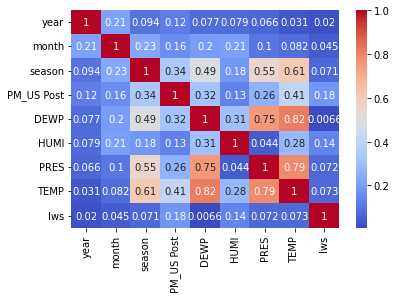

In [ ]:
sns.heatmap(data.corr().abs(), annot = True, cmap = 'coolwarm')

(0.0, 350.0)

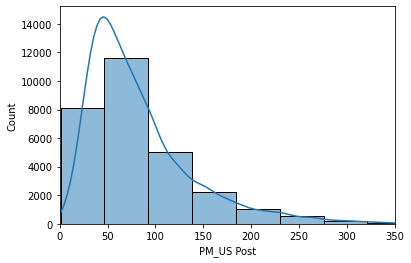

In [ ]:
f = sns.histplot(x='PM_US Post', bins=15, data=data, kde=True)
f.set_xlim(0,350)

In [ ]:
cnt = data['PM_US Post'].count()
f_h_PM = data[data['PM_US Post'] < 150].count()
f_h = f_h_PM['PM_US Post']
print(f"{round(f_h/cnt * 100, 2)}% izmerenih PM čestica je ispod 150 ug/m3")

88.02% izmerenih PM čestica je ispod 150 ug/m3


Text(0.5, 0, 'Godina')

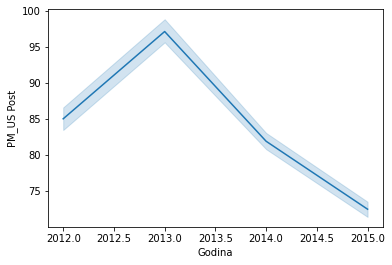

In [ ]:
sns.lineplot(y='PM_US Post', x='year', data=data)
plt.xlabel("Godina")

Text(0.5, 0, 'Godišnje doba')

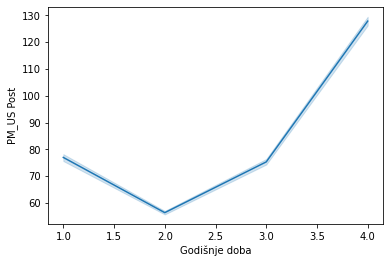

In [ ]:
sns.lineplot(y='PM_US Post', x='season', data=data)
plt.xlabel("Godišnje doba")

Text(0.5, 20.80000000000002, 'Temperatura')

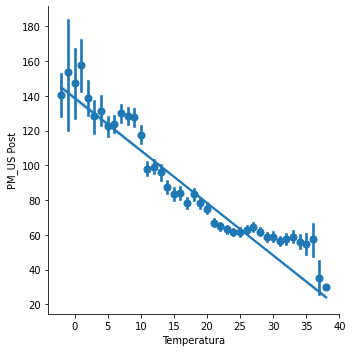

In [ ]:
sns.lmplot(y='PM_US Post', x='TEMP', data=data, x_estimator=np.mean)
plt.xlabel("Temperatura")

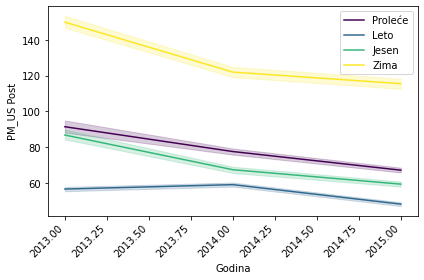

In [ ]:
dat2 = data[(data['year'] == 2013) | (data['year'] == 2014) | (data['year'] == 2015)]
sns.lineplot(data=dat2, y='PM_US Post', x='year', hue='season', palette='viridis')
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light')
plt.xlabel("Godina")
plt.legend(labels=("Proleće", "Leto", "Jesen", "Zima"))
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Kumulativna brzina vetra')

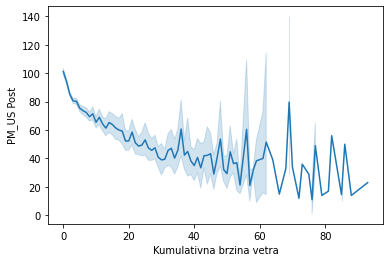

In [ ]:
sns.lineplot(y='PM_US Post', x='Iws', data=data)
plt.xlabel("Kumulativna brzina vetra")

Text(0.5, 0, 'Meseci')

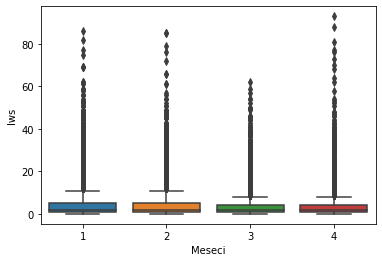

In [ ]:
sns.boxplot(x='season', y='Iws', data=data)
plt.xlabel("Meseci")

Text(0.5, 6.79999999999999, 'Vazdušni pritisak')

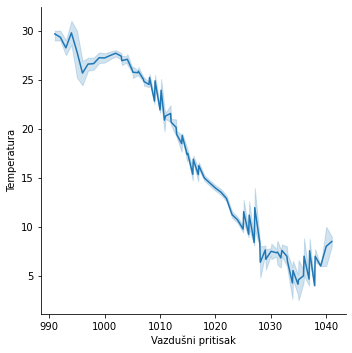

In [ ]:
sns.relplot(data=data, y='TEMP', x='PRES', kind="line")
plt.ylabel("Temperatura")
plt.xlabel("Vazdušni pritisak")

Text(0.5, 20.80000000000002, 'Pritisak')

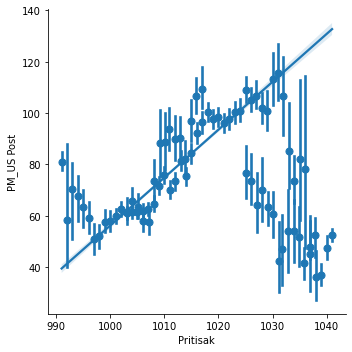

In [ ]:
sns.lmplot(data=data, x='PRES', y='PM_US Post', x_estimator=np.mean)
plt.xlabel("Pritisak")

Text(0, 0.5, 'Vazdušni pritisak')

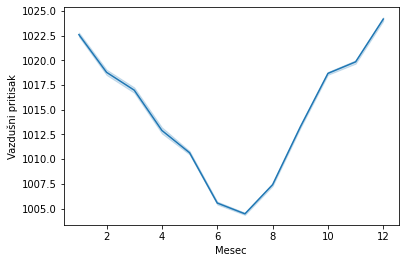

In [ ]:
sns.lineplot(data=data, y='PRES', x='month')
plt.xlabel("Mesec")
plt.ylabel("Vazdušni pritisak")

## **Predviđanje**

In [ ]:
y = data["PM_US Post"]
x = data.drop(columns=["PM_US Post"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)
x_train_std = pd.DataFrame(x_train_std)
x_test_std = pd.DataFrame(x_test_std)
x_train_std.columns = list(x.columns)
x_test_std.columns = list(x.columns)
x_train_std.head()

,year,month,season,DEWP,HUMI,PRES,TEMP,Iws
0,0.250322,-1.741122,1.338242,-1.444520,0.151732,1.547441,-1.598778,-0.513026
1,-0.703514,-0.865348,-1.475408,-0.371001,-2.227767,-0.943092,1.254297,-0.513026
2,-0.703514,-0.281498,-0.537525,1.239278,1.183864,-1.067619,0.605871,-0.352292
3,0.250322,1.470050,1.338242,-1.444520,0.777770,1.173861,-1.858148,0.290644
4,1.204158,0.302351,-0.537525,1.239278,0.328463,-0.569512,0.994926,0.933580


In [ ]:
def model_evaluation(y, y_predicted, N, d):
    mse = mean_squared_error(y_test, y_predicted) # np.mean((y_test-y_predicted)**2)
    mae = mean_absolute_error(y_test, y_predicted) # np.mean(np.abs(y_test-y_predicted))
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predicted)
    r2_adj = 1-(1-r2)*(N-1)/(N-d-1)

    # printing values
    print('Mean squared error: ', mse)
    print('Mean absolute error: ', mae)
    print('Root mean squared error: ', rmse)
    print('R2 score: ', r2)
    print('R2 adjusted score: ', r2_adj)
    
    # Uporedni prikaz nekoliko pravih i predvidjenih vrednosti
    res=pd.concat([pd.DataFrame(y.values), pd.DataFrame(y_predicted)], axis=1)
    res.columns = ['y', 'y_pred']
    print(res.head(10))

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
x_inter_train = poly.fit_transform(x_train_std)
x_inter_test = poly.transform(x_test_std)

Mean squared error:  2050.547405027618
Mean absolute error:  33.416332093413544
Root mean squared error:  45.28297036444957
R2 score:  0.3702199547617414
R2 adjusted score:  0.3693470451391111
      y     y_pred
0  67.0  49.231981
1  98.0  71.452860
2  87.0  53.381670
3  23.0  64.011915
4  33.0  43.644437
5  79.0  74.074568
6  25.0  77.560415
7  37.0  47.203226
8  50.0  68.697994
9  20.0  66.625842


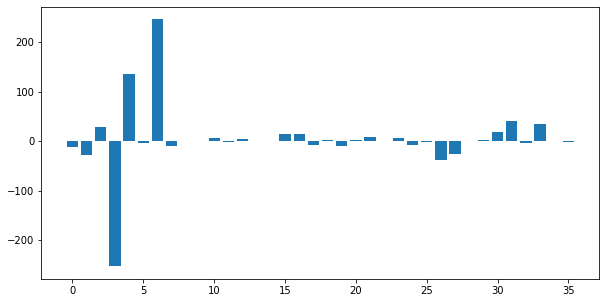

koeficijenti:  [-1.12561311e+01 -2.70166689e+01  2.82381584e+01 -2.52742724e+02
  1.36402147e+02 -3.65825633e+00  2.45648994e+02 -8.84760331e+00
  2.37734519e-01 -7.17076550e-01  6.18712891e+00 -1.14197437e+00
  4.18839440e+00  3.74448739e-01  1.41265860e-01  1.41307549e+01
  1.37825749e+01 -7.27403774e+00  1.82704834e+00 -1.02969120e+01
  1.69165899e+00  8.01334745e+00 -1.76718084e-01  7.26328459e+00
 -8.40009937e+00 -2.45086298e+00 -3.76487660e+01 -2.53191379e+01
 -5.76240558e-01  2.64273149e+00  1.86003242e+01  4.02610117e+01
 -3.25802595e+00  3.37978063e+01  1.72626174e-01 -1.52653900e+00]


In [ ]:
regression_model_degree = LinearRegression(fit_intercept=True)

# Obuka modela
regression_model_degree.fit(x_inter_train, y_train)

# Testiranje
y_predicted = regression_model_degree.predict(x_inter_test)

# Evaluacija
model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_test.shape[1])

# Ilustracija koeficijenata
plt.figure(figsize=(10,5))
plt.bar(range(len(regression_model_degree.coef_)),regression_model_degree.coef_)
plt.show()
print("koeficijenti: ", regression_model_degree.coef_)

In [ ]:
'''lasso_model = Lasso(alpha=0.01)

lasso_model.fit(x_inter_train, y_train)

y_predicted = lasso_model.predict(x_inter_test)

model_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])

plt.figure(figsize=(10,5))
plt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)
plt.show()
#print("koeficijenti: ", lasso_model.coef_)
print("koeficijenti: ", len(lasso_model.coef_))'''

'lasso_model = Lasso(alpha=0.01)\n\nlasso_model.fit(x_inter_train, y_train)\n\ny_predicted = lasso_model.predict(x_inter_test)\n\nmodel_evaluation(y_test, y_predicted, x_inter_train.shape[0], x_inter_train.shape[1])\n\nplt.figure(figsize=(10,5))\nplt.bar(range(len(lasso_model.coef_)),lasso_model.coef_)\nplt.show()\n#print("koeficijenti: ", lasso_model.coef_)\nprint("koeficijenti: ", len(lasso_model.coef_))'